# **CHAPTER 10**
# **Introduction to Artificial Neural Network with Keras**

## **Set up**

In [1]:
# Python ≥ 3.7 is required
import sys
assert sys.version_info >= (3,7)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

from packaging import version
# TensorFlow ≥ 2.8 is required
import tensorflow as tf
assert version.parse(tf.__version__) >= version.parse("2.8.0")

# Imports
import os
import numpy as np

# setting the random seed to make the results stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# where to save the figures
PROJECT_ROOT_DIR = '.'
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension='png', resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + '.' + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

2025-03-24 08:25:32.704951: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-24 08:25:32.705368: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-24 08:25:32.707793: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-24 08:25:32.714640: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742801132.725945    7620 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742801132.72

## **Perceptrons**

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2,3)] # petal length, petal width
y = (iris.target == 0) # Iris setosa

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)FD  
per_clf.fit(X,y)

Perceptron(random_state=42)

In [3]:
per_clf.coef_ , per_clf.intercept_

(array([[-1.4, -2.2]]), array([4.]))

In [4]:
y_pred = per_clf.predict([[2, 0.5], [3, 1]])
y_pred

array([ True, False])

In [5]:
# build and train Perceptron from SGDClassifier

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss='perceptron', penalty=None,
                        learning_rate='constant', eta0=1, random_state=42)
sgd_clf.fit(X, y)

SGDClassifier(eta0=1, learning_rate='constant', loss='perceptron', penalty=None,
              random_state=42)

In [6]:
sgd_clf.coef_, sgd_clf.intercept_

(array([[-1.4, -2.2]]), array([4.]))

In [7]:
assert (sgd_clf.coef_ == per_clf.coef_).all()
assert (sgd_clf.intercept_ == sgd_clf.intercept_).all()

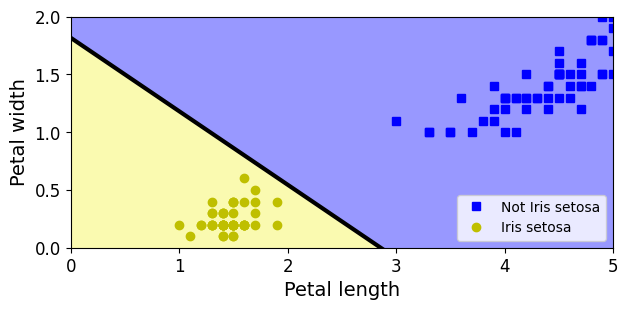

In [8]:
# plot of the decision boundary of a Perceptron on the iris dataset

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

a = -per_clf.coef_[0, 0] / per_clf.coef_[0, 1]
b = -per_clf.intercept_ / per_clf.coef_[0, 1]
axes = [0, 5, 0, 2]
x0, x1 = np.meshgrid(
    np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
    np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
)
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.figure(figsize=(7, 3))
plt.plot(X[y == 0, 0], X[y == 0, 1], "bs", label="Not Iris setosa")
plt.plot(X[y == 1, 0], X[y == 1, 1], "yo", label="Iris setosa")
plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-",
         linewidth=3)
plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="lower right")
plt.axis(axes)
plt.show()

## **Activation functions**

In [9]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0,z)

def derivative(f, z, eps=1e-6):
    return (f(z + eps) - f(z - eps))/(2 * eps)

Saving figure activation_functions_plot


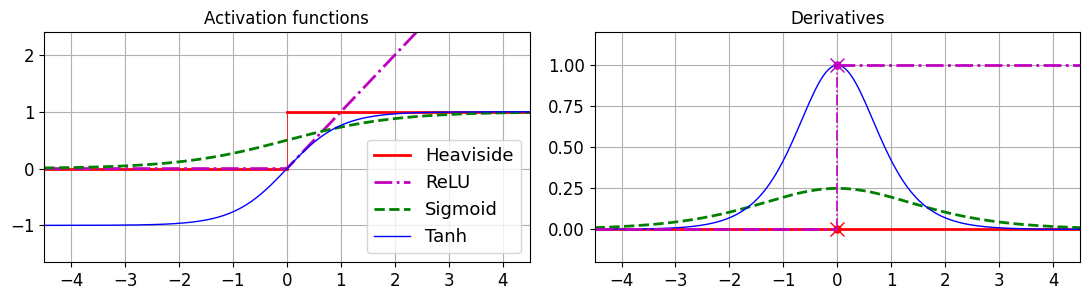

In [10]:
max_z = 4.5
z = np.linspace(-max_z, max_z, 200)

plt.figure(figsize=(11, 3.1))

plt.subplot(121)
plt.plot([-max_z, 0], [0,0], "r-", linewidth=2, label="Heaviside")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.plot([0, 0], [0, 1], "r-", linewidth=0.5)
plt.plot([0, max_z], [1, 1], "r-", linewidth=2)
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=1, label="Tanh")
plt.grid(True)
plt.title("Activation functions")
plt.axis([-max_z, max_z, -1.65, 2.4])
plt.gca().set_yticks([-1, 0, 1, 2])
plt.legend(loc="lower right", fontsize=13)

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=2, label="Heaviside")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=1, label="Tanh")
plt.plot([-max_z, 0], [0, 0], "m-.", linewidth=2)
plt.plot([0, max_z], [1, 1], "m-.", linewidth=2)
plt.plot([0, 0], [0, 1], "m-.", linewidth=1.2)
plt.plot(0, 1, "mo", markersize=5)
plt.plot(0, 1, "mx", markersize=10)
plt.grid(True)
plt.title("Derivatives")
plt.axis([-max_z, max_z, -0.2, 1.2])

save_fig("activation_functions_plot")
plt.show()

## **Regression MLPs**

Import or define `root_mean_squared_error()`

In [11]:
try:
    from sklearn.metrics import root_mean_squared_error
except ImportError:
    from sklearn.metrics import mean_squared_error

    def root_mean_squared_error(labels, predictions):
        mean_squared_error(labels, predictions, squared=False)

In [12]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, test_size=0.25, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.25, random_state=42)

mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)
rmse = root_mean_squared_error(y_valid, y_pred)

In [13]:
rmse

np.float64(0.5053326657968684)

## **Classification MLPs**

In [14]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

iris = load_iris()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    iris.data, iris.target, test_size=0.1, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.1, random_state=42)
mlp_clf = MLPClassifier([5], max_iter=10000, random_state=42)

pipeline = make_pipeline(StandardScaler(), mlp_clf)
pipeline.fit(X_train, y_train)
accuracy = pipeline.score(X_valid, y_valid)
accuracy

1.0

## **Implementing MLPs with Keras**

### **Building an Image Classifier Using the Sequential API**

Loading the fashion MNIST dataset.
The dataset is already split in 60,000 images for the training set and 10,000 images for the test set.\
We will split the training set in 55,000 images for the training and 5,000 for validation.

In [15]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:55000], y_train_full[:55000]
X_valid, y_valid = X_train_full[55000:], y_train_full[55000:]

The training set contains 60,000 grayscale images, each 28x28 pixels:

In [16]:
X_train.shape

(55000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [17]:
X_train[0,0,0].dtype, X_train[0,0,0]

(dtype('uint8'), np.uint8(0))

In [18]:
X_train[0].ravel()

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   1,   0,   0,  13,  73,   0,   0,   1,
         4,   0,   0,   0,   0,   1,   1,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   3,   0,  36, 136, 127,  62,
        54,   0,   0,   0,   1,   3,   4,   0,   0,   3,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0, 102, 204,
       176, 134, 144, 123,  23,   0,   0,   0,   0,  12,  10,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

Let's scale the pixel intensities down to 0-1 range and convert them to floats, by dividing by 255:

In [19]:
X_train, X_valid, X_test = X_train/255., X_valid/255., X_test/255.

Plot of one image

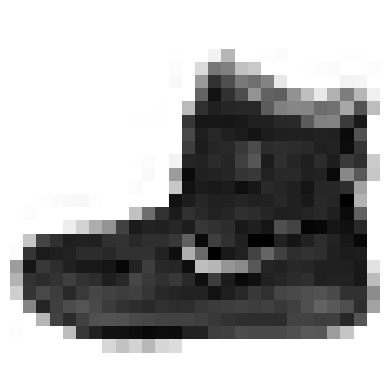

In [20]:
plt.imshow(X_train[0], cmap='binary')
plt.axis('off')
plt.show()

The labels are the class IDs represented as uint8, from 0 to 9:

In [21]:
y_train

array([9, 0, 0, ..., 9, 0, 2], dtype=uint8)

Here are the corresponding class names:

In [22]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Class of the first image in the training set: 'Ankle boot'

In [23]:
class_names[y_train[0]]

'Ankle boot'

Plot of some images in the dataset:

Saving figure fashion_mnist_plot


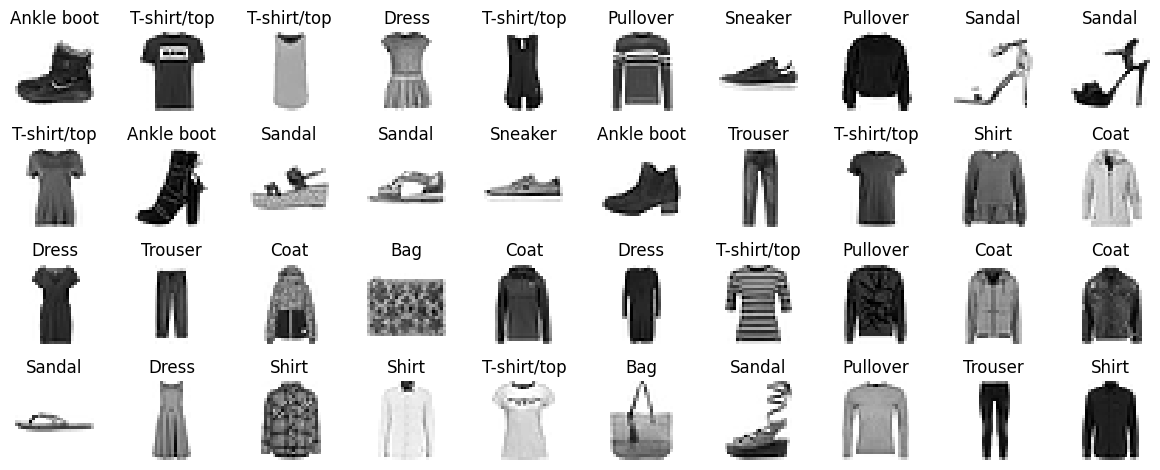

In [24]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))

for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index +1)
        plt.imshow(X_train[index], cmap='binary', interpolation='nearest')
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)

save_fig('fashion_mnist_plot')
plt.show()

### **Creating the model using the Sequential API**

In [25]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(shape=[28,28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation='relu'))
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

W0000 00:00:1742801141.706859    7620 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [26]:
# extra code - another way to define a sequential model
# clear the session to reset the name counters
tf.keras.backend.clear_session()
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

/home/dfg/dev/handson-ml2/.venv/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
# display the model architecture
# tf.keras.utils.plot_model(model, './images/my_fashion_mnist_model.png', show_shapes=True)

In [29]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [30]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [31]:
model.get_layer('dense') is hidden1

True

In [32]:
weights, biases = hidden1.get_weights()
weights

array([[-0.03446472,  0.01474046,  0.05973244, ..., -0.01389277,
         0.04633844,  0.01004938],
       [ 0.03750642,  0.00119049, -0.05058227, ...,  0.06130199,
        -0.02111433,  0.022623  ],
       [ 0.00791644,  0.00554682,  0.06044906, ...,  0.06242844,
         0.00658296, -0.06749755],
       ...,
       [ 0.00234232,  0.02138641, -0.06730382, ...,  0.05819958,
         0.0406249 ,  0.01441506],
       [ 0.0088536 ,  0.02832363,  0.00997479, ..., -0.06831573,
        -0.01064346,  0.03088061],
       [ 0.05426173, -0.02508819,  0.0074859 , ..., -0.01541717,
        -0.00899311, -0.03958665]], dtype=float32)

In [33]:
weights.shape

(784, 300)

In [34]:
28*28

784

In [35]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [36]:
biases.shape

(300,)

### **Compiling the model**

In [37]:
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=[tf.keras.metrics.sparse_categorical_accuracy])

In [38]:
# convert class ids to one-hot vectors
tf.keras.utils.to_categorical([0, 5, 1, 0], num_classes=10)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [39]:
# convert one-hot vectors to class ids
np.argmax(
    [[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
     [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
     [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
     [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
     axis=1
)

array([0, 5, 1, 0])

### **Training and evaluating the model**

In [40]:
history = model.fit(X_train, y_train, epochs=30, 
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.9610 - sparse_categorical_accuracy: 0.6958 - val_loss: 0.5065 - val_sparse_categorical_accuracy: 0.8272
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.5057 - sparse_categorical_accuracy: 0.8244 - val_loss: 0.4564 - val_sparse_categorical_accuracy: 0.8368
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.4526 - sparse_categorical_accuracy: 0.8432 - val_loss: 0.4316 - val_sparse_categorical_accuracy: 0.8444
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.4221 - sparse_categorical_accuracy: 0.8529 - val_loss: 0.4139 - val_sparse_categorical_accuracy: 0.8518
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.4004 - sparse_categorical_accuracy: 0.8595 - val_loss: 0.4011 - val_sparse_categorical_accuracy: 0.8538
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.3832 - sparse_categorical_accuracy: 0.8647 - val_loss: 0.3914 - val_sparse_categorical_accuracy:

In [41]:
history.params

{'verbose': 'auto', 'epochs': 30, 'steps': 1719}

In [42]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


Saving figure keras_learning_curves_plot


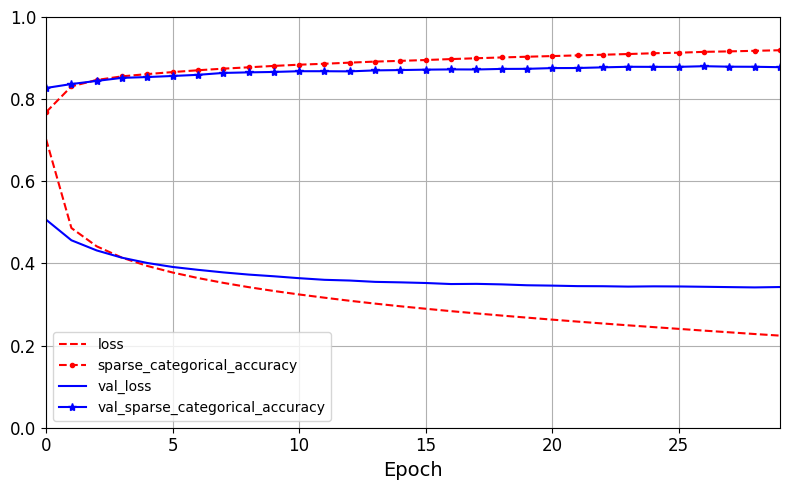

In [43]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8,5), xlim=[0,29], ylim=[0,1], grid=True, xlabel='Epoch',
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")
save_fig('keras_learning_curves_plot')
plt.show()

In [44]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3631 - sparse_categorical_accuracy: 0.8752


[0.36030182242393494, 0.8752999901771545]

### **Using the model to make predictions**

In [45]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.17, 0.  , 0.01, 0.  , 0.82],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [46]:
y_pred = y_proba.argmax(axis=-1)
y_pred

array([9, 2, 1])

In [47]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [48]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

Saving figure fashion_mnist_images_plot


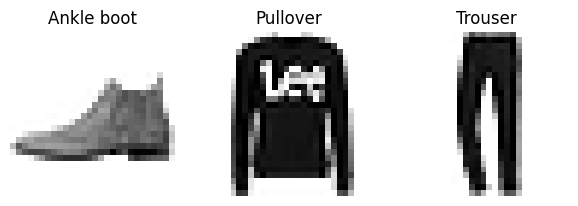

In [49]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()

## **Building a Regression MLP Using the Sequential API**

Load, split and scale the California housing dataset

In [50]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

In [51]:
X_train.shape[1:]

(8,)

In [52]:
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1),
])

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss='mse', optimizer=optimizer, metrics=['root_mean_squared_error'])
norm_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20


/home/dfg/dev/handson-ml2/.venv/lib/python3.10/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.7547 - root_mean_squared_error: 1.2723 - val_loss: 0.4323 - val_root_mean_squared_error: 0.6575
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3987 - root_mean_squared_error: 0.6312 - val_loss: 0.4797 - val_root_mean_squared_error: 0.6926
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3643 - root_mean_squared_error: 0.6034 - val_loss: 0.4032 - val_root_mean_squared_error: 0.6350
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3464 - root_mean_squared_error: 0.5884 - val_loss: 0.3365 - val_root_mean_squared_error: 0.5800
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3346 - root_mean_squared_error: 0.5783 - val_loss: 0.6598 - val_root_mean_squared_error: 0.8123
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3266 - root_mean_squared_error: 0.5714 - val_loss: 0.8740 - val_root_mean_squared_error: 0.9349
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3

Evaluate the model

In [53]:
mse_test, rmse_test = model.evaluate(X_test, y_test)
mse_test, rmse_test

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2860 - root_mean_squared_error: 0.5347 


(0.28956449031829834, 0.5381119847297668)

In [54]:
X_new = X_test[:3]
y_pred = model.predict(X_new)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


array([[0.50173116],
       [1.2959113 ],
       [5.141689  ]], dtype=float32)

## **Building Complex Models Using the Functional API**

In [55]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

The wide deep neural network

In [56]:
normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation='relu')
hidden_layer2 = tf.keras.layers.Dense(30, activation='relu')
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized, hidden2])
output  = output_layer(concat)

model = tf.keras.Model(inputs=[input_], outputs=[output])

In [57]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 8)         │         17 │ input_layer[0][0] │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 30)        │        270 │ normalization[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 30)        │        930 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 38)        │          0 │ normalization[0]… │
│ (Concatenate)       │                   │            │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1)         │         39 │ concatenate[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,256 (4.91 KB)

 Trainable params: 1,239 (4.84 KB)

 Non-trainable params: 17 (72.00 B)

In [58]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss='mse', optimizer=optimizer, metrics=['root_mean_squared_error'])
normalization_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20


/home/dfg/dev/handson-ml2/.venv/lib/python3.10/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 8))
  warnings.warn(msg)


363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3.0528 - root_mean_squared_error: 1.6958 - val_loss: 1.9964 - val_root_mean_squared_error: 1.4129
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.6058 - root_mean_squared_error: 0.7767 - val_loss: 0.4225 - val_root_mean_squared_error: 0.6500
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4582 - root_mean_squared_error: 0.6762 - val_loss: 0.3770 - val_root_mean_squared_error: 0.6140
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4109 - root_mean_squared_error: 0.6406 - val_loss: 0.3664 - val_root_mean_squared_error: 0.6053
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3890 - root_mean_squared_error: 0.6234 - val_loss: 0.4588 - val_root_mean_squared_error: 0.6774
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3759 - root_mean_squared_error: 0.6128 - val_loss: 0.4336 - val_root_mean_squared_error: 0.6585
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3

In [59]:
mse_test, rmse_test = model.evaluate(X_test, y_test)
mse_test, rmse_test

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3029 - root_mean_squared_error: 0.5502 


(0.30638816952705383, 0.5535234212875366)

In [60]:
y_pred = model.predict(X_new)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


/home/dfg/dev/handson-ml2/.venv/lib/python3.10/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(3, 8))
  warnings.warn(msg)


We send different subsets of input features through the wide and deep paths. \
Features 0 to 4 through the wide path and features 2 to 7 through the deep path.

In [61]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [62]:
input_wide = tf.keras.layers.Input(shape=[5]) # features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6]) # features 2 to 7

norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()

norm_wide = norm_layer_wide(input_wide)
norm_deep =  norm_layer_deep(input_deep)

hidden1 = tf.keras.layers.Dense(30, activation='relu')(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation='relu')(hidden1)

concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)

model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])

In [63]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss='mse', optimizer=optimizer, metrics=['root_mean_squared_error'])

X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)

history = model.fit(x=(X_train_wide, X_train_deep), y=y_train, epochs=20,
                    validation_data=((X_valid_wide, X_valid_deep), y_valid))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.8060 - root_mean_squared_error: 1.6396 - val_loss: 1.5408 - val_root_mean_squared_error: 1.2413
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6158 - root_mean_squared_error: 0.7842 - val_loss: 0.4926 - val_root_mean_squared_error: 0.7018
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5011 - root_mean_squared_error: 0.7076 - val_loss: 0.4459 - val_root_mean_squared_error: 0.6678
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4487 - root_mean_squared_error: 0.6696 - val_loss: 0.3916 - val_root_mean_squared_error: 0.6258
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4216 - root_mean_squared_error: 0.6491 - val_loss: 0.3897 - val_root_mean_squared_error: 0.6243
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4047 - root_mean_squared_error: 0.6360 - val_loss: 0.3580 - val_root_mean_squared_error: 0.5983
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step 

In [64]:
mse_test, rmse_test = model.evaluate(x=(X_test_wide, X_test_deep), y=y_test)
mse_test, rmse_test

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step - loss: 0.3376 - root_mean_squared_error: 0.5810


(0.3338249623775482, 0.5777758955955505)

In [65]:
y_pred = model.predict((X_new_wide, X_new_deep))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


array([[0.4812805],
       [1.2828228],
       [3.5528445]], dtype=float32)

Adding an auxiliary output for regularization:

In [66]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [67]:
input_wide = tf.keras.layers.Input(shape=[5]) # features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6]) # features 2 to 7

norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()

norm_wide = norm_layer_wide(input_wide)
norm_deep =  norm_layer_deep(input_deep)

hidden1 = tf.keras.layers.Dense(30, activation='relu')(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation='relu')(hidden1)

concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
aux_output = tf.keras.layers.Dense(1)(hidden2)

model = tf.keras.Model(inputs=[input_wide, input_deep], 
                       outputs=[output, aux_output])

Keras requires one metric per output

In [68]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=('mse', 'mse'), loss_weights=(0.9, 0.1), optimizer=optimizer, 
              metrics=['root_mean_squared_error', 'root_mean_squared_error'])

In [69]:
norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit(
    x=(X_train_wide, X_train_deep), y=(y_train, y_train), epochs=20,
    validation_data = ((X_valid_wide, X_valid_deep), (y_valid, y_valid))
)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - dense_2_loss: 1.8445 - dense_2_root_mean_squared_error: 1.3388 - dense_3_loss: 2.9247 - dense_3_root_mean_squared_error: 1.6940 - loss: 1.9525 - val_dense_2_loss: 1.1037 - val_dense_2_root_mean_squared_error: 1.0508 - val_dense_3_loss: 3.1643 - val_dense_3_root_mean_squared_error: 1.7792 - val_loss: 1.3103
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - dense_2_loss: 0.5157 - dense_2_root_mean_squared_error: 0.7177 - dense_3_loss: 0.9405 - dense_3_root_mean_squared_error: 0.9688 - loss: 0.5582 - val_dense_2_loss: 0.4713 - val_dense_2_root_mean_squared_error: 0.6866 - val_dense_3_loss: 0.8579 - val_dense_3_root_mean_squared_error: 0.9264 - val_loss: 0.5102
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - dense_2_loss: 0.4314 - dense_2_root_mean_squared_error: 0.6566 - dense_3_loss: 0.6264 - dense_3_root_mean_squared_error: 0.7913 - loss: 0.4509 - val_dense_2_loss: 0.4489 - val_dense_2_root_mean_squared_error: 0.6701 - val_

In [70]:
eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
weighted_sum_of_losses, main_los, aux_loss = eval_results[:3]
weighted_sum_of_losses, main_los, aux_loss

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - dense_2_loss: 0.3317 - dense_2_root_mean_squared_error: 0.5759 - dense_3_loss: 0.3910 - dense_3_root_mean_squared_error: 0.6253 - loss: 0.3377


(0.3345215618610382, 0.32839450240135193, 0.38642579317092896)

In [71]:
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))
y_pred_main, y_pred_aux 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


(array([[0.5086798],
        [1.1648464],
        [3.5743437]], dtype=float32),
 array([[0.6291899],
        [0.9747644],
        [3.2537143]], dtype=float32))

In [72]:
y_pred_tuple = model.predict((X_new_wide, X_new_deep))
y_pred = dict(zip(model.output_names, y_pred_tuple))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


{'dense_2': array([[0.5086798],
        [1.1648464],
        [3.5743437]], dtype=float32),
 'dense_3': array([[0.6291899],
        [0.9747644],
        [3.2537143]], dtype=float32)}

## **Using the Subclassing API to Build Dynamic Models**

In [73]:
class WideAndDeepModel(tf.keras.Model):
    def __init__(self, units=30, activation='relu', **kwargs):
        super().__init__(**kwargs)
        self.norm_layer_wide = tf.keras.layers.Normalization()
        self.norm_layer_deep = tf.keras.layers.Normalization()
        
        self.hidden1 = tf.keras.layers.Dense(units, activation=activation)
        self.hidden2 = tf.keras.layers.Dense(units, activation=activation)

        self.main_output = tf.keras.layers.Dense(1)
        self.aux_output = tf.keras.layers.Dense(1)

    def call(self, inputs):
        input_wide, input_deep = inputs
        norm_wide = self.norm_layer_wide(input_wide)
        norm_deep = self.norm_layer_deep(input_deep)
        hidden1 = self.hidden1(norm_deep)
        hidden2 = self.hidden2(hidden1)
        concat = tf.keras.layers.concatenate([norm_wide, hidden2])
        output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return output, aux_output

tf.random.set_seed(42)
model = WideAndDeepModel(units=30, activation='relu', name='wide_and_deep_model')        

In [74]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=['mse', 'mse'], loss_weights=(0.9, 0.1), optimizer=optimizer,
              metrics=['root_mean_squared_error', 'root_mean_squared_error'])
model.norm_layer_wide.adapt(X_train_wide)
model.norm_layer_deep.adapt(X_train_deep)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid))
)

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.8062 - mse_loss: 2.7089 - root_mean_squared_error: 1.6443 - root_mean_squared_error_1: 1.6173 - val_loss: 0.6445 - val_mse_loss: 0.8425 - val_root_mean_squared_error: 0.7890 - val_root_mean_squared_error_1: 0.9180
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6068 - mse_loss: 0.6687 - root_mean_squared_error: 0.7742 - root_mean_squared_error_1: 0.8174 - val_loss: 0.4954 - val_mse_loss: 0.7010 - val_root_mean_squared_error: 0.6875 - val_root_mean_squared_error_1: 0.8374
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4964 - mse_loss: 0.5857 - root_mean_squared_error: 0.6974 - root_mean_squared_error_1: 0.7652 - val_loss: 0.5902 - val_mse_loss: 0.5267 - val_root_mean_squared_error: 0.7728 - val_root_mean_squared_error_1: 0.7258
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4443 - mse_loss: 0.5430 - root_mean_squared_error: 0.6581 - root_mean_squared_error_1: 0.7368 - val_loss: 0.71

In [75]:
eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
eval_results

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3592 - mse_loss: 0.4107 - root_mean_squared_error: 0.5944 - root_mean_squared_error_1: 0.6408


[0.3528503477573395,
 0.5886145830154419,
 0.5886145830154419,
 0.4107952415943146,
 0.4107952415943146,
 0.6405469179153442]

In [76]:
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))
y_pred_main, y_pred_aux

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


(array([[0.3080376],
        [1.2570813],
        [3.591138 ]], dtype=float32),
 array([[0.52065325],
        [1.1206939 ],
        [3.3819423 ]], dtype=float32))

## **Saving and Restoring a Model**

In [77]:
from pathlib import Path
Path('./models').mkdir(parents=True, exist_ok=True)

Save a model using the `.keras` format

In [78]:
model.save(filepath='./models/my_model.keras')

Load a `.keras` model. \
If the model uses any custom object, you must pass them to the function via the `custom_objects` argument:

In [79]:
loaded_model = tf.keras.models.load_model(
    filepath='./models/my_model.keras',
    custom_objects={'WideAndDeepModel': WideAndDeepModel}
)

Save weigths with the extension `.weights.h5`

In [80]:
model.save_weights('./models/my_model_weights.weights.h5')

In [81]:
model.load_weights('./models/my_model_weights.weights.h5')

## **Using Callback**

In [82]:
import shutil
shutil.rmtree('./model_checkpoints', ignore_errors=True)

In [83]:
Path('./model_checkpoints').mkdir(parents=True, exist_ok=True)

In [84]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('./model_checkpoints/my_checkpoints.weights.h5',
                                                   save_weights_only=True)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[checkpoint_cb]
)

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3586 - mse_loss: 0.4114 - root_mean_squared_error: 0.5938 - root_mean_squared_error_1: 0.6413 - val_loss: 1.2371 - val_mse_loss: 0.9560 - val_root_mean_squared_error: 1.1262 - val_root_mean_squared_error_1: 0.9779
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3543 - mse_loss: 0.4092 - root_mean_squared_error: 0.5901 - root_mean_squared_error_1: 0.6396 - val_loss: 1.3973 - val_mse_loss: 1.4937 - val_root_mean_squared_error: 1.1775 - val_root_mean_squared_error_1: 1.2224
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3511 - mse_loss: 0.4024 - root_mean_squared_error: 0.5877 - root_mean_squared_error_1: 0.6342 - val_loss: 1.3098 - val_mse_loss: 0.6588 - val_root_mean_squared_error: 1.1756 - val_root_mean_squared_error_1: 0.8118
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3495 - mse_loss: 0.4005 - root_mean_squared_error: 0.5864 - root_mean_squared_error_1: 0.6328 - val_loss: 0.89

In [85]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10,
                                                     restore_best_weights=True)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=100,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[checkpoint_cb, early_stopping_cb]
)

Epoch 1/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3353 - mse_loss: 0.3779 - root_mean_squared_error: 0.5749 - root_mean_squared_error_1: 0.6147 - val_loss: 0.8128 - val_mse_loss: 0.5368 - val_root_mean_squared_error: 0.9184 - val_root_mean_squared_error_1: 0.7328
Epoch 2/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3317 - mse_loss: 0.3776 - root_mean_squared_error: 0.5714 - root_mean_squared_error_1: 0.6144 - val_loss: 0.6880 - val_mse_loss: 0.5626 - val_root_mean_squared_error: 0.8378 - val_root_mean_squared_error_1: 0.7501
Epoch 3/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3282 - mse_loss: 0.3726 - root_mean_squared_error: 0.5685 - root_mean_squared_error_1: 0.6103 - val_loss: 0.4566 - val_mse_loss: 0.3799 - val_root_mean_squared_error: 0.6820 - val_root_mean_squared_error_1: 0.6164
Epoch 4/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3264 - mse_loss: 0.3719 - root_mean_squared_error: 0.5668 - root_mean_squared_error_1: 0.6097 - val_loss: 

In [86]:
class PrintValTrainRatioCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        ratio =logs['val_loss']  / logs['loss']
        print(f'Epoch={epoch}, val/train={ratio:.2f}')

In [87]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[val_train_ratio_cb], verbose=0)

Epoch=0, val/train=2.03
Epoch=1, val/train=3.12
Epoch=2, val/train=3.51
Epoch=3, val/train=3.91
Epoch=4, val/train=4.44
Epoch=5, val/train=2.55
Epoch=6, val/train=2.31
Epoch=7, val/train=1.48
Epoch=8, val/train=1.67
Epoch=9, val/train=1.43


# **Using Tensorboard for Visualization**

In [88]:
import shutil
shutil.rmtree("./model_logs", ignore_errors=True)

In [89]:
Path('./model_logs').mkdir(parents=True, exist_ok=True)

In [90]:
from pathlib import Path
from time import strftime

def get_run_logdir(root_logdir='./model_logs'):
    return Path(root_logdir) / strftime("run_%Y_%m_%d_%H_%M_%S")

run_logdir = get_run_logdir()
run_logdir

PosixPath('model_logs/run_2025_03_24_08_30_09')

In [91]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)

In [92]:
tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir=run_logdir,
                                                profile_batch=(100, 200))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb])

Epoch 1/20


2025-03-24 08:30:09.251238: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:103] Profiler session initializing.
2025-03-24 08:30:09.251258: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:118] Profiler session started.
2025-03-24 08:30:09.251341: I external/local_xla/xla/backends/profiler/gpu/cupti_tracer.cc:1006] Profiler found 1 GPUs
2025-03-24 08:30:09.251475: E external/local_xla/xla/backends/profiler/gpu/cupti_error_manager.cc:153] cuptiGetTimestamp: error 999: 
2025-03-24 08:30:09.251482: E external/local_xla/xla/backends/profiler/gpu/cupti_error_manager.cc:206] cuptiSubscribe: ignored due to a previous error.
2025-03-24 08:30:09.251484: E external/local_xla/xla/backends/profiler/gpu/cupti_error_manager.cc:243] cuptiGetResultString: ignored due to a previous error.
2025-03-24 08:30:09.251488: E external/local_xla/xla/backends/profiler/gpu/cupti_tracer.cc:1112] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with

259/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 1.6908 - loss: 2.8916

2025-03-24 08:30:09.612454: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:103] Profiler session initializing.
2025-03-24 08:30:09.612479: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:118] Profiler session started.
2025-03-24 08:30:09.612490: E external/local_xla/xla/backends/profiler/gpu/cupti_error_manager.cc:151] cuptiGetTimestamp: ignored due to a previous error.
2025-03-24 08:30:09.612495: E external/local_xla/xla/backends/profiler/gpu/cupti_error_manager.cc:206] cuptiSubscribe: ignored due to a previous error.
2025-03-24 08:30:09.612498: E external/local_xla/xla/backends/profiler/gpu/cupti_error_manager.cc:243] cuptiGetResultString: ignored due to a previous error.
2025-03-24 08:30:09.612501: E external/local_xla/xla/backends/profiler/gpu/cupti_tracer.cc:1112] function cupti_interface_->Subscribe( &subscriber_, (CUpti_CallbackFunc)ApiCallback, this)failed with error 
2025-03-24 08:30:09.712592: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:68] 

363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 1.6202 - loss: 2.6611 - val_RootMeanSquaredError: 0.9589 - val_loss: 0.9196
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.9594 - loss: 0.9215 - val_RootMeanSquaredError: 0.8538 - val_loss: 0.7290
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 0.8927 - loss: 0.7977 - val_RootMeanSquaredError: 0.8146 - val_loss: 0.6636
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 0.8545 - loss: 0.7310 - val_RootMeanSquaredError: 0.7882 - val_loss: 0.6212
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - RootMeanSquaredError: 0.8248 - loss: 0.6811 - val_RootMeanSquaredError: 0.7636 - val_loss: 0.5832
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.7984 - loss: 0.6383 - val_RootMeanSquaredError: 0.7393 - val_loss: 0.5466
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.7741 - loss: 0.6000 -

In [93]:
print('model_logs')
for path in sorted(Path('./model_logs').glob(('**/*'))):
    print(' ' * (len(path.parts)-1) + path.parts[-1])

model_logs
 run_2025_03_24_08_30_09
  train
   events.out.tfevents.1742801409.dfg.7620.0.v2
   plugins
    profile
     2025_03_24_08_30_09
      dfg.xplane.pb
  validation
   events.out.tfevents.1742801409.dfg.7620.1.v2


Load the `tensorboard` Jupyter extension and start the TensorBoard server:

In [96]:
%load_ext tensorboard
%tensorboard --logdir=./model_logs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 23712), started 0:11:48 ago. (Use '!kill 23712' to kill it.)

Access TensorBoard in a seperate tab.

In [95]:
from IPython.display import display, HTML
display(HTML('<a href="http://localhost:6006/">http://localhost:6006/</a>'))

## **Fine-Tuning Neural Network Hyperparameters**

Let's use the Fashion MNIST dataset.

In [106]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [107]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [108]:
import keras_tuner as kt

def build_model(hp):
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=16, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    optimizer = hp.Choice("optimizer", values=["sgd", "adam"])
    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten())
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
    model.add(tf.keras.layers.Dense(10, activation="softmax"))
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
                  metrics=["accuracy"])
    return model



In [109]:
random_search_tuner = kt.RandomSearch(
    build_model, objective='val_accuracy', max_trials=5, overwrite=True,
    directory="my_fashion_mnist", project_name="my_rnd_search", seed=42)
random_search_tuner.search(X_train, y_train, epochs=10,
                           validation_data=(X_valid, y_valid))

Trial 5 Complete [00h 00m 28s]
val_accuracy: 0.829800009727478

Best val_accuracy So Far: 0.8565999865531921
Total elapsed time: 00h 02m 33s


In [103]:
top3_models = random_search_tuner.get_best_models(num_models=3)
best_model = top3_models[0]

In [104]:
top3_params = random_search_tuner.get_best_hyperparameters(num_trials=3)
top3_params[0].values  # best hyperparameter values

{'n_hidden': 7,
 'n_neurons': 100,
 'learning_rate': 0.0012482904754698163,
 'optimizer': 'sgd'}

In [105]:
best_trial = random_search_tuner.oracle.get_best_trials(num_trials=1)[0]
best_trial.summary()

Trial 1 summary
Hyperparameters:
n_hidden: 7
n_neurons: 100
learning_rate: 0.0012482904754698163
optimizer: sgd
Score: 0.8507999777793884


In [110]:
best_trial.metrics.get_last_value('val_accuracy')

np.float64(0.8507999777793884)

In [111]:
best_model.fit(X_train_full, y_train_full, epochs=10)
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8762 - loss: 0.3349
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8793 - loss: 0.3236
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8853 - loss: 0.3126
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8888 - loss: 0.3019
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8917 - loss: 0.2939
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8956 - loss: 0.2859
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8969 - loss: 0.2796
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8990 - loss: 0.2713
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9014 - loss: 0.2657
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9041 - loss: 0.2593
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8529 - loss: 0.4414


In [112]:
class MyClassificationHyperModel(kt.HyperModel):
    def build(self, hp):
        return build_model(hp)
    
    def fit(self, hp, model, X, y, **kwargs):
        if hp.Boolean('normalize'):
            norm_layer = tf.keras.layers.Normalization()
            X = norm_layer(X)
        return model.fit(X, y, **kwargs)

In [113]:
hyperband_tuner = kt.Hyperband(
    MyClassificationHyperModel(), objective='val_accuracy', seed=42,
    max_epochs=10, factor=3, hyperband_iterations=2,
    overwrite=True, directory='my_fashion_mnist', project_name='hyperband')

In [114]:
root_logdir = Path(hyperband_tuner.project_dir) / "tensorboard"
tensorboard_cb = tf.keras.callbacks.TensorBoard(root_logdir)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=2)
hyperband_tuner.search(X_train, y_train, epochs=10,
                       validation_data=(X_valid, y_valid),
                       callbacks=[early_stopping_cb, tensorboard_cb])

Trial 60 Complete [00h 00m 33s]
val_accuracy: 0.8238000273704529

Best val_accuracy So Far: 0.8705999851226807
Total elapsed time: 00h 19m 43s


In [115]:
bayesian_opt_tuner = kt.BayesianOptimization(
    MyClassificationHyperModel(), objective='val_accuracy', seed=42,
    max_trials=10, alpha=1e-4, beta=2.6,
    overwrite=True, directory='my_fashion_mnist', project_name='bayesian_opt')
bayesian_opt_tuner.search(X_train, y_train, epochs=10,
                          validation_data=(X_valid, y_valid),
                          callbacks=[early_stopping_cb])

Trial 10 Complete [00h 00m 31s]
val_accuracy: 0.8375999927520752

Best val_accuracy So Far: 0.8557999730110168
Total elapsed time: 00h 05m 39s
